Created by Anna VorreutherYoo, S.-S., et al., Brain–computer interface using fMRI: spatial navigation by thoughts. Neuroreport, 2004. 15(10): p. 1591-1595.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# load data
data = pd.read_csv("../data + material/data/derivative/data.csv", sep=";", index_col=False)
ratings = pd.read_csv("../data + material/data/derivative/ratings.csv", sep=";", index_col=False)

data = pd.merge(left=data, right=ratings)
data = data.append(dict(data.mean(axis=0, numeric_only=True)), ignore_index=True)
data.at[data.index[-1], 'participants'] = "group_mean"
data = data.append(dict(data.std(axis=0, numeric_only=True)), ignore_index=True)
data.at[data.index[-1], 'participants'] = "group_std"
data

C:\Users\Anna\AppData\Local\Temp\ipykernel_228812\1480510317.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dict(data.mean(axis=0, numeric_only=True)), ignore_index=True)
C:\Users\Anna\AppData\Local\Temp\ipykernel_228812\1480510317.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dict(data.std(axis=0, numeric_only=True)), ignore_index=True)


,participants,start_setup,best_channel_setupa_hbo,best_channel_setupa_hbo_value,best_channel_setupa_hbr,best_channel_setupa_hbr_value,best_channel_setupb_hbo,best_channel_setupb_hbo_value,best_channel_setupb_hbr,best_channel_setupb_hbr_value,...,comfortability10,concentration11,alertness11,comfortability11,concentration12,alertness12,comfortability12,concentrationAVG,alertnessAVG,comfortabilityAVG
0,1.0,B,5-3,0.962000,4-8,0.854000,8-8,1.588000,8-8,1.792000,...,8.000000,7.00,7.000000,8.00000,6.000000,7.0,8.000000,7.333333,7.666667,5.833333
1,2.0,A,2-3,7.529000,2-3,10.084000,5-5,4.680000,2-3,10.294000,...,7.000000,8.00,8.000000,8.00000,7.000000,8.0,8.000000,10.000000,8.916667,10.000000
2,3.0,A,2-6,34.630000,2-6,40.920000,2-3,40.090000,2-3,37.750000,...,7.000000,8.50,8.000000,6.50000,8.500000,8.0,6.000000,8.541667,8.333333,8.166667
3,4.0,B,5-6,6.988000,9-6,6.150000,5-5,10.508000,5-6,14.835000,...,10.000000,10.00,8.000000,10.00000,10.000000,8.0,10.000000,6.750000,7.250000,7.833333
4,5.0,B,2-6,2.893000,2-2,3.417000,2-1,4.851000,3-3,7.313000,...,4.000000,8.00,6.000000,4.00000,7.000000,6.0,4.000000,7.833333,7.916667,7.500000
5,6.0,B,2-2,2.173000,1-2,5.457000,2-2,5.406000,2-2,4.858000,...,7.000000,7.00,7.000000,7.00000,7.000000,7.0,6.000000,8.250000,8.416667,7.916667
6,7.0,A,1-2,2.554000,2-6,9.774000,2-1,4.912000,6-6,3.568000,...,8.000000,8.00,7.000000,8.00000,8.000000,7.0,8.000000,7.916667,8.000000,8.083333
7,8.0,A,1-2,4.732000,8-7,4.787000,5-7,3.397000,3-1,5.205000,...,7.000000,8.00,8.000000,7.00000,7.000000,7.0,7.000000,8.500000,7.666667,7.083333
8,9.0,A,2-6,6.869000,2-3,8.142000,2-6,9.966000,2-3,10.236000,...,6.000000,8.00,7.000000,6.00000,8.000000,7.0,6.000000,6.500000,4.500000,5.166667
9,10.0,B,3-2,2.970000,3-4,5.039000,2-1,2.998000,2-2,3.560000,...,4.500000,7.00,7.000000,4.50000,7.000000,7.0,4.000000,7.500000,7.750000,7.750000


In [3]:
# determine channel of interest based on highest t-value of localizer runs
channel_vals = data.filter([
                            'best_channel_setupa_hbo_value',
                            'best_channel_setupa_hbr_value',
                            'best_channel_setupb_hbo_value', 
                            'best_channel_setupb_hbr_value'
                        ], axis=1)
coi = channel_vals.max(axis=1)
data["coi_value"] = coi

In [4]:
# correlations between columns
data_filtered = data.filter([
    'avg_st_accuracy',
    'avg_wholerun_accuracy',
    'age',
    'alertnessAVG',
    'coi_value',
    'comfortabilityAVG',
    'concentrationAVG',
    'easiness',
    'pleasantness',
    'rating_easiness',
    'rating_pleasantness',
    'suitability_score',
    ], axis=1)

df = data_filtered[:-2] # drop group data again before computing correlations

rho = df.corr(method='pearson')
pval = df.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001, 0.01, 0.05] if x<=t]))
rho_p = rho.round(2).astype(str) + p
print(f"Rho = {rho_p}")

f1 = sns.lmplot(x="coi_value", y="avg_st_accuracy", data=df)
plt.suptitle("all participants")
plt.title("correlation ST accuracy * COI value: "+rho_p["avg_st_accuracy"]["coi_value"], ha="left")
plt.tight_layout()

,avg_st_accuracy,avg_wholerun_accuracy,age,alertnessAVG,coi_value,comfortabilityAVG,concentrationAVG,easiness,pleasantness,suitability_score
avg_st_accuracy,1.0***,0.8**,0.5,-0.13,0.71*,0.13,-0.22,-0.15,0.46,-0.67*
avg_wholerun_accuracy,0.8**,1.0***,0.27,-0.12,0.45,0.32,0.02,-0.08,0.58,-0.48
age,0.5,0.27,1.0***,0.3,0.87**,0.34,0.42,0.06,-0.22,-0.48
alertnessAVG,-0.13,-0.12,0.3,1.0***,0.12,0.79**,0.76*,-0.32,-0.45,-0.22
coi_value,0.71*,0.45,0.87**,0.12,1.0***,0.26,0.17,0.16,0.22,-0.73*
comfortabilityAVG,0.13,0.32,0.34,0.79**,0.26,1.0***,0.78**,-0.11,-0.15,-0.38
concentrationAVG,-0.22,0.02,0.42,0.76*,0.17,0.78**,1.0***,-0.18,-0.44,-0.17
easiness,-0.15,-0.08,0.06,-0.32,0.16,-0.11,-0.18,1.0***,0.18,0.34
pleasantness,0.46,0.58,-0.22,-0.45,0.22,-0.15,-0.44,0.18,1.0***,-0.37
suitability_score,-0.67*,-0.48,-0.48,-0.22,-0.73*,-0.38,-0.17,0.34,-0.37,1.0***


In [7]:
relevant_correlations = [
    'avg_st_accuracy',
    'suitability_score',    
    'alertnessAVG',
    'comfortabilityAVG',
    'concentrationAVG',
    'easiness', 
    'pleasantness', 
    'coi_value',
    ]
result = rho.filter(relevant_correlations)
result = result.loc[result.index.isin(relevant_correlations)]

tmp = list()
for idx in result.index:
    tmp.append(relevant_correlations.index(idx))
result['idx'] = tmp
result = result.sort_values('idx')
result = result.drop('idx', axis=1)
result.round(2)

,avg_st_accuracy,suitability_score,alertnessAVG,comfortabilityAVG,concentrationAVG,easiness,pleasantness,coi_value
avg_st_accuracy,1.00,-0.67,-0.13,0.13,-0.22,-0.15,0.46,0.71
suitability_score,-0.67,1.00,-0.22,-0.38,-0.17,0.34,-0.37,-0.73
alertnessAVG,-0.13,-0.22,1.00,0.79,0.76,-0.32,-0.45,0.12
comfortabilityAVG,0.13,-0.38,0.79,1.00,0.78,-0.11,-0.15,0.26
concentrationAVG,-0.22,-0.17,0.76,0.78,1.00,-0.18,-0.44,0.17
easiness,-0.15,0.34,-0.32,-0.11,-0.18,1.00,0.18,0.16
pleasantness,0.46,-0.37,-0.45,-0.15,-0.44,0.18,1.00,0.22
coi_value,0.71,-0.73,0.12,0.26,0.17,0.16,0.22,1.00


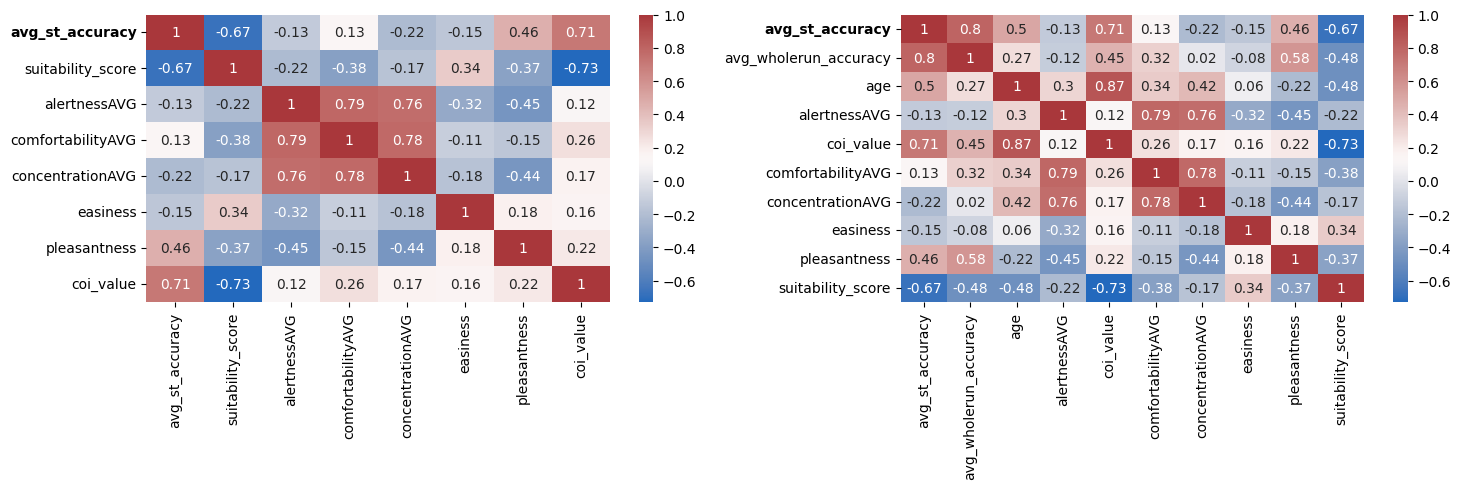

In [8]:
fig,axes = plt.subplots(1,2, figsize=[15,5])
for ax, d in zip(axes, [result, rho]):
    mask = np.zeros_like(d)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(d.round(2), 
            #xticklabels=d.columns.values,
            #yticklabels=d.index.values,
            annot=True,
            #mask=mask,
            cmap="vlag",
            ax=ax)
    labels = ax.get_yticklabels()
    for l in labels:
        if l.get_text() == "avg_st_accuracy":
            l.set_fontweight("bold")   
    ax.set_yticklabels(labels)
    
plt.tight_layout()